#BÀI TẬP QUÁ TRÌNH: Vietnamese News Headlines Dataset For Sarcasm Detection

- Thực hiện: Nhóm Nopen
- Thành viên:
  - Vũ Anh Đức (19521384)
  - Châu Thiên Long (21520331)
  - Tăng Minh Hiển (21520229)
  - Nguyễn Thái Thành Long (21520334)


## Các công cụ hỗ trợ được sử dụng


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Trong bài tập này, Nhóm có sử dụng các công cụ:
1. Bộ Toolkit thực hiện Vietnamese Word Segmentation
- Tên toolkit:  VnCoreNLP: A Vietnamese natural language processing toolkit
- Chức năng: Thực hiện phân tách từ theo ngữ nghĩa của Tiếng Việt, các từ phải đi với nhau thì mới mang đúng ý nghĩa sẽ được gom nhóm như từ "học sinh", "bằng chứng". Thay vì tách riêng 2 từ là "học" và "sinh" thì sẽ được phân tách thành 1 từ là "học_sinh".
- Lý do sử dụng: Nhóm sử dụng 2 phương pháp trích xuất đặc trưng cho các headlines là Count Vectorizer. Các phương pháp này sẽ thực hiện xây dựng bộ vocabulary trên tập Train bằng cách tách các từ theo khoảng trắng và xem xét tần suất xuất hiện của các từ trên trong headlines. Vì thế, nhóm sử dụng thêm toolkit VNCoreLP, để thực hiện phân tách các từ đúng với ý nghĩa tiếng Việt, đảm bảo trích xuất được đặc trưng của headlines phù hợp với ngôn ngữ tiếng Việt.

Ví dụ: Tôi là sinh viên -> Được phân tách thành: Tôi là sinh_viên (sinh viên -> sinh_viên)
- Link tham khảo: https://github.com/vncorenlp/VnCoreNLP
- Tỉ lệ chính xác trong phân tách từ của bộ toolkit được công bố tại: http://nlpprogress.com/vietnamese/vietnamese.html

2. Nhóm sử dụng thư viện "unidecode": để chuyển đổi dữ liệu text dạng non-ASCII (ở đây là dạng unicode) thành dạng ASCII

3. Nhóm sử dụng thêm mô hình Pre-trained cho ngôn ngữ tiếng Việt PhoBERT, thực hiệntokenize cho dữ liệu dạng text.

- Link dùng model: https://github.com/VinAIResearch/PhoBERT

In [2]:
!pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645933 sha256=7c973b677ee1b089838d92312b957c2669f822a3ab32c93ef283955008be1bc2
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp


In [3]:
!pip3 install py_vncorenlp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.0 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4305 sha256=605a0a025459249d7bdcc97a0a6cbb87b867ce36e4d60d5403ac72a6d7c941fc
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [4]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.5 MB/s eta 0:00:00


In [5]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00


In [6]:
import torch
from transformers import AutoModel, AutoTokenizer

phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Some weights of the model checkpoint at vinai/phobert-base-v2 were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.0/728.0 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 34.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: ten

## Library Setup

In [8]:
import numpy as np
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud

import time
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [9]:
#Set up vncorelp to use in this assignment
import logging
from vncorenlp import VnCoreNLP
import py_vncorenlp

In [10]:
#py_vncorenlp.download_model(save_dir='/content/drive/MyDrive/Sarcasm/vnNLP')
py_vncorenlp.download_model(save_dir='/content/')

# Load VnCoreNLP from the local working folder that contains both `VnCoreNLP-1.2.jar` and `models`
#model = py_vncorenlp.VnCoreNLP(save_dir='/content/drive/MyDrive/Sarcasm/vnNLP')
model = py_vncorenlp.VnCoreNLP(save_dir='/content/')

## Quy trình thực hiện của bài tập của nhóm:

1. Tổng hợp dữ liệu từ các nhóm và load dữ liệu
2. Tiền xử lý dữ liệu
3. Visualize dữ liệu
4. Trích xuất đặc trưng từ dữ liệu text
5. Huấn luyện mô hình
6. Dự đoán và so sánh kết quả, nhận xét mô hình


## Data for Sacrasm Headlines Newspaper Detection Task

Link dữ liệu được lấy từ các nhóm
- Nhóm KHNT: https://github.com/dnsang1611/CS114.N21-KHNT/blob/master/sarcasm-detection/sarcasm_detection_dataset.json
- Nhóm PHVT: https://github.com/phongidoit/CS114/blob/main/sarcasm_detection_dataset1.json
- Nhóm PKLD: https://github.com/KiRzEa/CS114/blob/main/SarcasmData/SarcasmData_fixed.json
- Nhóm Fusionist: https://github.com/HungStark/sarcasm_detection_dataset
- Nhóm ThreeSome: https://github.com/TruongNoDame/Sarcasm-Detection/blob/main/sarcasm_detection_dataset.json
- Nhóm Nopen: https://github.com/Tlon9/CS114/blob/main/sarcasm_detection_dataset.json
- Nhóm Nhom8: https://github.com/npk7264/CS114/blob/main/sarcasm_detection_dataset.json
- Nhóm Minions: https://github.com/Quan-Minh/CS114/blob/main/sarcasm_detection_dataset.json
- Nhóm Trương Quang Nghĩa - Phạm Thanh Lâm - Đào Duy Thịnh: https://github.com/tqnghia210/CS114/blob/main/data_ne.json
- Nhóm HNNT: https://github.com/ngcthc/CS114-ML-Public/blob/main/sarcasm_detection_dataset.json
- Nhóm DuongGiaARap: https://github.com/Sang-UIT/CS114/blob/main/sarcasm_detection_dataset.json
- Nhóm 2Q2T: https://github.com/Kuma221203/CS114/blob/main/sarcasm_detection_dataset.json
- Nhóm NSFW: https://github.com/uyenbhku/CS114.N21/blob/main/sarcasm_detection_dataset/NSFW.json

Nhóm đã tổng hợp và lưu thành file sarcasm_data.json, được lưu trong drive đính kèm trong đường dẫn

In [11]:
link_data = '/content/drive/MyDrive/CS114/Sacrasm_Headlines_Newspaper_Detection/sarcasm_data.json'

data = pd.read_json(link_data,lines =True)
data.head ()

,is_sarcastic,headline,article_link
0,0,Điểm chuẩn đánh giá năng lực Học viện Công ngh...,https://tuoitre.vn/diem-chuan-danh-gia-nang-lu...
1,0,"Cần Thơ công bố điểm chuẩn lớp 10, cao nhất 37...",https://tuoitre.vn/can-tho-cong-bo-diem-chuan-...
2,0,"Công nhận bằng tiến sĩ, thạc sĩ do nước ngoài ...",https://tuoitre.vn/cong-nhan-bang-tien-si-thac...
3,0,Trường THCS Nguyễn Văn Tố (quận 10) lần đầu xé...,https://tuoitre.vn/truong-thcs-nguyen-van-to-q...
4,0,Chương trình Học giả Fulbright Việt Nam 2024 t...,https://tuoitre.vn/chuong-trinh-hoc-gia-fulbri...


Thực hiện drop cột "article_link" do thuộc tính này nhóm dùng để kiểm tra xem bài báo có tồn tại hay không và không dùng cho việc huấn luyện mô hình của nhóm.

Kiểm tra dataset có bị thiếu thông tin của thuộc tính nào hay không.

In [12]:
data.drop('article_link',axis =1, inplace = True)
data.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

In [13]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8138 entries, 0 to 8137
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  8138 non-null   int64 
 1   headline      8138 non-null   object
dtypes: int64(1), object(1)
memory usage: 127.3+ KB


Kiểm tra số lượng dữ liệu bị trùng trong dataset giữa các nhóm: Có 1282 mẫu dữ liệu trùng trong toàn bộ các mẫu của bộ dữ liệu

In [14]:
#data.drop_duplicates(subset = ['headline'],inplace = True)
data.duplicated().sum()

1282

Kiểm tra số lượng dữ liệu không được gán nhãn is_sarcastic và không đúng nhãn 0 hoặc 1: Tất cả các mẫu dữ liệu được gán nhãn đúng.

In [15]:
data.count() - data[data['is_sarcastic'] != 0].count() - data[data['is_sarcastic'] != 1].count()

is_sarcastic    0
headline        0
dtype: int64

## Preprocessing - Tiền xử lý dữ liệu

Công việc thực hiện:
1. Loại bỏ dữ liệu nhiễu: Xác định là các headlines bị rỗng dù được gán nhãn
2. Loại bỏ các dấu câu, trong đó thực hiện loại dấu phẩy (,), dấu chấm (.), dấu trừ/gạch nối (-), dấu hai chấm (:), dấu ngoặc đơn('), dấu ngoặc kép (").

3. Chuyển các từ về dạng lowercase
4. Dùng toolkit VNCoreLP để thực hiện word segmentation cho tiếng Việt
5. Loại bỏ các stopword. Nhóm sử dụng bộ Vietnamese Stopword để thực hiện loại bỏ stopword này

**Stopword**: các từ có tần số xuất hiện nhiều nhưng thường mang ít giá trị ý nghĩa và không khác nhau nhiều trong các văn bản khác nhau.

Link lấy bộ Vietnamese stopword: https://github.com/stopwords/vietnamese-stopwords

### 1. Loại bỏ dữ liệu nhiễu gồm: các mẫu dữ liệu có headlines rỗng

In [16]:
#Loại bỏ các dữ liệu có headlines rỗng
data = data[data['headline'].apply(len) > 0]

#Loại bỏ trùng lập headlines
#data.drop_duplicates(subset = ['headline'],inplace = True)

In [17]:
data.duplicated().sum()

1276

### 2. Loại bỏ các dấu câu và chuyển các từ về dạng lowercase

In [18]:
#regex = re.compile('[^a-z\s]')
#Đưa các từ lowercase
data['text'] = data['headline'].str.lower()
#stop_words = set(line.strip() for line in open('/content/drive/MyDrive/Sarcasm/vietnamese-stopwords.txt'))
#data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
#data['text'] = data['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
#data['text'] = data['text'].apply(word_tokenize)

#Loại bỏ dấu câu
character = ['\'','.',',','-',':','"','(',')','@','?','/']
character = set(character)
data['text'] = data['text'].apply(lambda x: ''.join([char for char in x if char not in character]))
data.head()

<ipython-input-18-eb7c170944c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['headline'].str.lower()
<ipython-input-18-eb7c170944c3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: ''.join([char for char in x if char not in character]))


,is_sarcastic,headline,text
0,0,Điểm chuẩn đánh giá năng lực Học viện Công ngh...,điểm chuẩn đánh giá năng lực học viện công ngh...
1,0,"Cần Thơ công bố điểm chuẩn lớp 10, cao nhất 37...",cần thơ công bố điểm chuẩn lớp 10 cao nhất 378...
2,0,"Công nhận bằng tiến sĩ, thạc sĩ do nước ngoài ...",công nhận bằng tiến sĩ thạc sĩ do nước ngoài c...
3,0,Trường THCS Nguyễn Văn Tố (quận 10) lần đầu xé...,trường thcs nguyễn văn tố quận 10 lần đầu xét ...
4,0,Chương trình Học giả Fulbright Việt Nam 2024 t...,chương trình học giả fulbright việt nam 2024 t...


### 3. Thực hiện Word Segmentation bằng bộ toolkit VNCoreLP

In [19]:
#rdrsegmenter = model.VnCoreNLP()#annotators=["wseg"], save_dir='/content/drive/MyDrive/Sarcasm/vnNLP')
'''for i in data['text']:
    output = model.word_segment(i)
        result = ""
        for j in output:
            result = result +  " ".join(j)
        data_train.append(result)'''

#Thực hiện Word Segmentation bằng toolkit VNCoreLP
data['text'] = data['text'].apply(lambda x: " ".join(word for word in model.word_segment(x)))

In [20]:
data.reset_index(inplace = True)
data

,index,is_sarcastic,headline,text
0,0,0,Điểm chuẩn đánh giá năng lực Học viện Công ngh...,điểm_chuẩn đánh_giá năng_lực học_viện công_ngh...
1,1,0,"Cần Thơ công bố điểm chuẩn lớp 10, cao nhất 37...",cần_thơ công_bố điểm_chuẩn lớp 10 cao nhất 378...
2,2,0,"Công nhận bằng tiến sĩ, thạc sĩ do nước ngoài ...",công_nhận bằng tiến_sĩ thạc_sĩ do nước_ngoài c...
3,3,0,Trường THCS Nguyễn Văn Tố (quận 10) lần đầu xé...,trường thcs nguyễn_văn tố quận 10 lần đầu xét ...
4,4,0,Chương trình Học giả Fulbright Việt Nam 2024 t...,chương_trình học_giả fulbright việt_nam 2024 t...
...,...,...,...,...
8125,8133,0,Kỷ niệm 50 năm Ngày ra mắt Trụ sở Chính phủ cá...,kỷ_niệm 50 năm ngày ra_mắt trụ_sở chính_phủ cá...
8126,8134,1,Olympic và bước đi thế kỷ,olympic và bước_đi thế_kỷ
8127,8135,1,Giá rau củ cao như cây cổ thụ,giá rau củ cao như cây_cổ_thụ
8128,8136,0,Thái Lan tận dụng các ưu đãi từ RCEP để tăng x...,thái_lan tận_dụng các ưu_đãi từ rcep để tăng x...


### 4. Loại bỏ Stopword bằng bộ Vietnamese Stopword

In [21]:
data_train = []

#Loại bỏ các stopword
link_vn_stopword = '/content/drive/MyDrive/CS114/Sacrasm_Headlines_Newspaper_Detection/vietnamese-stopwords.txt'
stop_words = set(line.strip() for line in open(link_vn_stopword))
#data['text'] = data['text'].apply(lambda x: " ".join(word for word in x if word not in stop_words))
for sentence in data['text']:
    sen_new = ""
    sen_temp = sentence.split()
    #print(sen_temp)
    for word in sen_temp:
        #print(word,'.')
        if (word not in stop_words):
            sen_new += word + " "
        #print()
    data_train.append(sen_new)

print ("Headlines after Preprocessing")
for i in range (0,20):
  print (f"{i+1}/",data_train[i])

Headlines after Preprocessing
1/ điểm_chuẩn đánh_giá năng_lực học_viện công_nghệ bưu_chính viễn_thông 2065 
2/ cần_thơ công_bố điểm_chuẩn lớp 10 378 
3/ công_nhận tiến_sĩ thạc_sĩ nước_ngoài 
4/ trường thcs nguyễn_văn tố 10 đầu xét kết_quả tiểu_học 
5/ chương_trình học_giả fulbright việt_nam 2024 tuyển ứng_viên 
6/ thí_sinh chứng_chỉ 109 miễn thi tốt_nghiệp môn ngoại_ngữ 
7/ chuyên_gia vip tư_vấn sinh_viên việt 
8/ phát_hiện đường vẽ nazca ẩn sa_mạc peru 
9/ 5 tuyển_sinh lớp 1 lớp 6 tphcm 
10/ thi tốt_nghiệp thpt 2023 ngăn gian_lận thi lưu_ý in đề 
11/ 5 ngành học triển_vọng nghề_nghiệp huflit 
12/ ngành công_nghệ_thông_tin trường đại_học phenikaa học không_chỉ 
13/ hiện_tượng gia_tăng tấn_công mạng kỳ thi tốt_nghiệp thpt 
14/ thí_sinh đăng_ký lớp 6 trường trần_đại_nghĩa 
15/ giá sách_giáo_khoa lớp 4 8 11 nhà_xuất_bản giáo_dục việt_nam 46% 
16/ trường đại_học ngoại_thương công_bố điểm_chuẩn xét tuyển 
17/ tưởng triệt_tiêu kỹ_năng sống 
18/ 3000 việc_làm lĩnh_vực kinh_tế chờ sinh_viên 
1

## Data Visualization

### 1. Phân bố nhãn

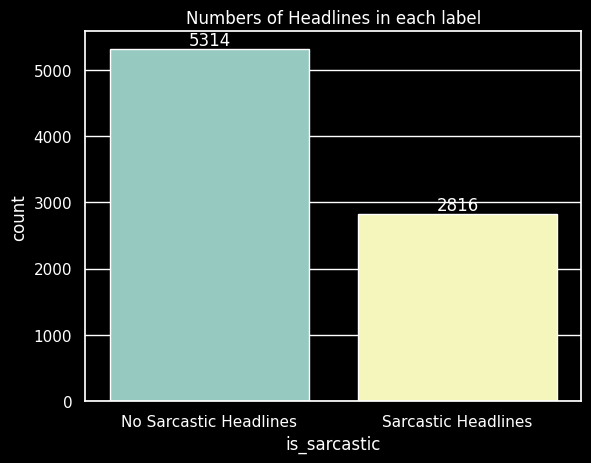

In [40]:
label_name = [
    'No Sarcastic Headlines',
    'Sarcastic Headlines'
]
plt.style.use('dark_background')
ax = sns.countplot(x ="is_sarcastic", data = data)
plt.xticks (ticks = data['is_sarcastic'].unique(), labels=label_name)
ax.bar_label (ax.containers[0])
plt.title ("Numbers of Headlines in each label")
plt.show ()

Nhận xét: Tổng cộng sau khi lọc các Headlines trùng, nhóm đã thu thập được 8130 dòng dữ liệu, trong đó 5314 dữ liệu thuộc label "No Sarcastic" và 2816 dữ liệu thuộc label "Sarcastic". Dữ liệu được thu thập có sự chênh lệch về số lượng với nhãn "No Sarcastic", mất cân bằng giữa 2 nhãn.

###2. Độ dài trung bình của Headlines trong trong 2 label

Khoảng giá trị về độ dài Headlines đối với từng nhãn

In [ ]:
df = data[data['is_sarcastic']==0]['headline'].apply(len)
print ("Thống kê về độ dài của headlines")
print("Độ dài trung bình của headlines:",data['headline'].apply(len).mean())

print ("Phân bố giá trị của headlines: Min =",data['headline'].apply(len).min(),", Max =",data['headline'].apply(len).max())
print('-' * 55)

print ("Label Sarcastic Headlines")
print ("Miền giá trị độ dài: Min =",data[data['is_sarcastic']==1]['headline'].apply(len).min(),", Max =",data[data['is_sarcastic']==1]['headline'].apply(len).max())
print ("Độ dài trung bình của headline:",data[data['is_sarcastic']==1]['headline'].apply(len).mean())

print('-' * 55)
print ("Label Not Sarcastic Headlines")
print ("Miền giá trị độ dài của headlines: Min =",data[data['is_sarcastic']==0]['headline'].apply(len).min(),", Max =",data[data['is_sarcastic']==0]['headline'].apply(len).max())
print ("Độ dài trung bình của headline:",data[data['is_sarcastic']==0]['headline'].apply(len).mean())

Thống kê về độ dài của headlines
Độ dài trung bình của headlines: 56.01968019680197
Phân bố giá trị của headlines: Min = 9 , Max = 161
-------------------------------------------------------
Label Sarcastic Headlines
Miền giá trị độ dài: Min = 9 , Max = 161
Độ dài trung bình của headline: 45.21484375
-------------------------------------------------------
Label Not Sarcastic Headlines
Miền giá trị độ dài của headlines: Min = 9 , Max = 136
Độ dài trung bình của headline: 61.74538953707189


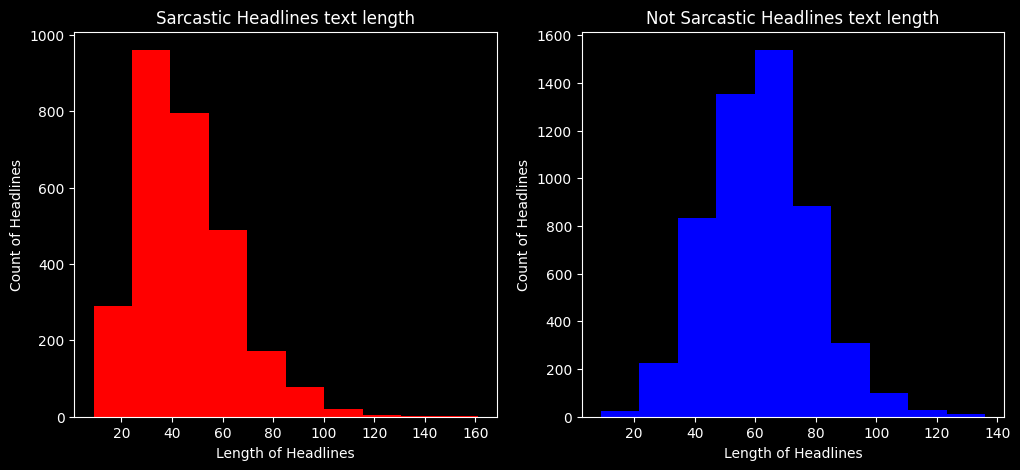

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
plt.style.use('dark_background')
text_len=data[data['is_sarcastic']==1]['headline'].apply(len)
ax1.hist(text_len,color='red')
ax1.set_xlabel('Length of Headlines')
ax1.set_ylabel('Count of Headlines')
ax1.set_title('Sarcastic Headlines text length')

text_len=data[data['is_sarcastic']==0]['headline'].apply(len)
ax2.hist(text_len,color='blue')
ax2.set_title('Not Sarcastic Headlines text length')
ax2.set_xlabel('Length of Headlines')
ax2.set_ylabel('Count of Headlines')

plt.show()

### 3. Thống kê các từ xuất hiện nhiều nhất trong tập dữ liệu

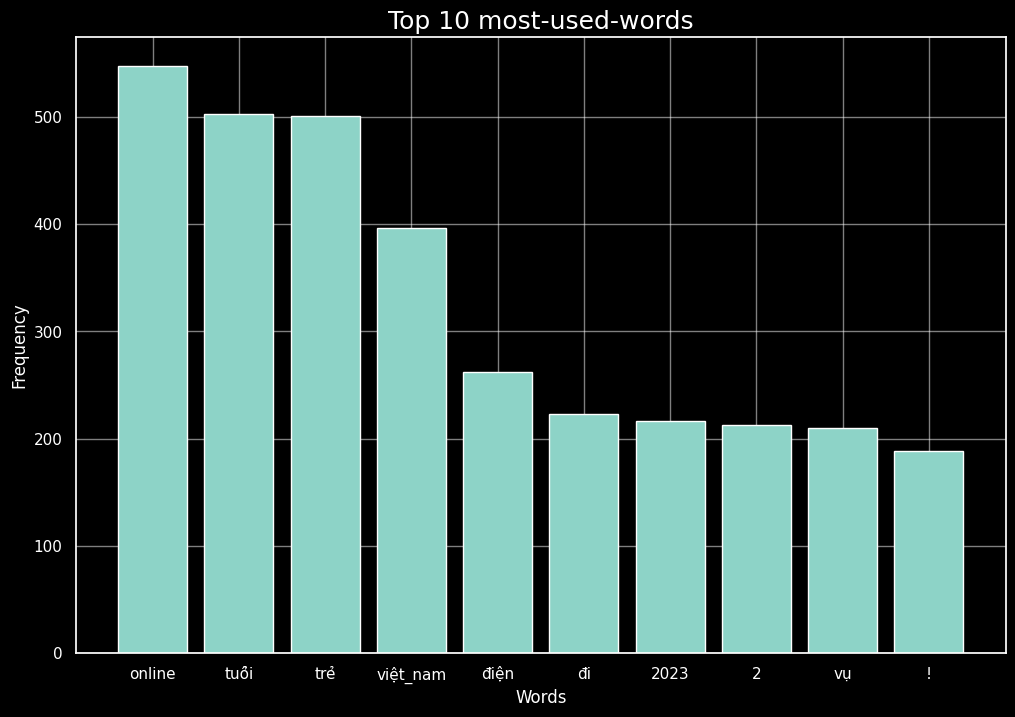

In [58]:
words = []

for text in data_train:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most-used-words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

##Spliting Data - Thực hiện phân chia tập dữ liệu thành tập Train và tập Test

- Tỉ lệ giữa tập Train và Test là 80:20

In [49]:
data['headline'] = np.array (data_train)

X = np.array(data['headline'])
Y = np.array(data['is_sarcastic'])

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 42, shuffle = True)

In [ ]:
print ("Thống kê số lượng dữ liệu của tập Train và tập Test")

print ("Tập train")
print ("Kích thước tập Train:",xtrain.shape)
for i in range (len(label_name)):
    print(label_name[i],":",np.count_nonzero(ytrain==i))
print('-' * 55)
print ("Tập test")
print ("Kích thước tập Test:",xtest.shape)
for i in range(len(label_name)):
    print(label_name[i],":",np.count_nonzero(ytest==i))

Thống kê số lượng dữ liệu của tập Train và tập Test
Tập train
Kích thước tập Train: (6504,)
No Sarcastic Headlines : 4254
Sarcastic Headlines : 2250
-------------------------------------------------------
Tập test
Kích thước tập Test: (1626,)
No Sarcastic Headlines : 1060
Sarcastic Headlines : 566


## Feature Extraction 1 - Thực hiện trích xuất đặc trưng cho dữ liệu Text bằng phương pháp Count Vectorizer

Đối với dữ liệu văn bản, để có thể trích xuất các đặc trưng với dữ liệu là văn bản thì nhóm đã sử dụng phương pháp trích xuất đặc trưng Count Vectorizer.

- Count Vectorizer là công cụ được hỗ trợ và có mã nguồn mở được phát triển bởi sklearn trong Python.

- Count Vectorizer là phương pháp chuyển một đoạn text thành một vector dựa trên tần suất xuất hiện của mỗi từ mà các từ đó xuất hiện trong các văn bản đã có, văn bản này gồm tập hợp nhiều các text.

Sau bước phân chia dữ liệu, thực hiện lấy tập các từ, thành bộ vocabulary,  xuất hiện trong tập Train. Sau đó thực hiện chuyển các văn bản ở tập Train và tập Test thành vector bằng cách đếm số lần xuất hiện của các từ trong bộ vocabulary đó trên từng điểm dữ liệu của tập Train và Test.

- Vector sau khi thực hiện trích xuất đặc trưng là ma trận thưa (sprase matrix) với kích thước là mxn, với m là số dòng dữ liệu và n là số từ vựng trong bộ vocalbulary được thu thập trong tập Train.


In [51]:
cv = CountVectorizer()

xtrain_transform = cv.fit_transform(xtrain)
xtest_transform = cv.transform (xtest)

Tập xtrain sau khi thực hiện trích xuất đặc trưng.

xtrain có shape là (6504,4328), trong đó số hàng là 6504 tương ứng với số dòng dữ liệu trong tập Test và 4328 là số từ vựng được tìm thấy trong tất cả dữ liệu trong tập Train, đây cũng là số lượng đặc trưng (atrribute) dùng để huấn luyện mô hình.

Điểm mạnh của phương pháp này là mỗi từ trong tập dữ liệu được biểu diễn thành vector và sẽ biểu diễn bằng tần số xuất hiện của từ này trong từng điểm dữ liệu. Hy vọng tần số này sẽ cho được mức độ quan trọng của từ đó với nhãn dữ liệu tương ứng.

In [52]:
print("Tập xtrain: ")
print(xtrain_transform.toarray())
print("Kích thước tập Train",xtrain_transform.toarray().shape)

Tập xtrain: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Kích thước tập Train (6504, 7522)


Tập xtest sau khi thực hiện trích xuất đặc trưng.

xtest có shape là (1626,4328), trong đó số hàng là 1626 tương ứng với số dòng dữ liệu trong tập Test và 4328 là số từ vựng được tìm thấy trong tất cả dữ liệu trong tập Train, cũng là số lượng đặc trưng dùng để thực hiện huấn luyện mô hình.


Có thể thấy điểm yếu của phương pháp này là với các tập Test chứa các từ quan trọng với nội dung phân loại nhưng lại chưa xuất hiện trong tập Train thì khi trích xuất đặc trưng sẽ không xuất hiện từ này, sẽ làm ảnh hưởng đến kết quả dự đoán.

In [53]:
print("Tập xtest: ")
print(xtest_transform.toarray())
print("Kích thước tập Train",xtest_transform.toarray().shape)

Tập xtest: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Kích thước tập Train (1626, 7522)


### Training


Nhóm thực hiện xây dựng 5 model để thực hiện phân lớp cho bài tập này tương ứng với dùng phương pháp trích xuất đặc trưng Count Vectorizer gồm:
1. Support Vector Classifier (SVC)*
2. Bernoulli Naive Bayes*
3. Decision Tree*
4. Logistic Regression*
5. Multinomial Naive Bayes*

*Các tham số được dùng mặc định cho từng mô hình

In [54]:
start1 = time.time()
clf = svm.SVC()
clf.fit(xtrain_transform,ytrain)
end1 = time.time()

start2 = time.time()
bnb = BernoulliNB()
bnb.fit(xtrain_transform,ytrain)
end2 = time.time()

start3 = time.time()
tree = DecisionTreeClassifier()
tree.fit(xtrain_transform,ytrain)
end3 = time.time()

start4 = time.time()
rgs = LogisticRegression()
rgs.fit(xtrain_transform,ytrain)
end4 = time.time()

start5 = time.time()
mnb = MultinomialNB()
mnb.fit (xtrain_transform,ytrain)
end5 = time.time()

### Predict

Kết quả phân lớp của 5 mô hình dựa trên Classfication Report

In [55]:
start6 = time.time()
pred_svm = clf.predict(xtest_transform)
end6 = time.time()

start7 = time.time()
pred_bnb = bnb.predict(xtest_transform)
end7 = time.time()

start8 = time.time()
pred_tree = tree.predict(xtest_transform)
end8 = time.time()

start9 = time.time()
pred_rgs = rgs.predict(xtest_transform)
end9 = time.time()

start10 = time.time()
pred_mnb = mnb.predict(xtest_transform)
end10 = time.time()

print ("1/ Model Support Vector Classifier")
print (f"Time Execution: {end1-start1+end6-start6}s")
print(f"Accuracy score: {accuracy_score(ytest,pred_svm)}")
print(classification_report(ytest,pred_svm))

print('-' * 55)

print ("2/ Model Bernouli Naive Bayes:")
print (f"Time Execution: {end2-start2+end7-start7}s")
print(f"Accuracy score: {accuracy_score(ytest,pred_bnb)}")
print(classification_report(ytest,pred_bnb))

print('-' * 55)

print ("3/ Decision Tree")
print (f"Time Execution: {end3-start3+end8-start8}s")
print(f"Accuracy score: {accuracy_score(ytest,pred_tree)}")
print(classification_report(ytest,pred_tree))

print('-' * 55)

print ("4/ Logistic Regression")
print (f"Time Execution: {end4-start4+end9-start9}s")
print(f"Accuracy score: {accuracy_score(ytest,pred_rgs)}")
print(classification_report(ytest,pred_rgs))

print('-' * 55)

print ("5/ Multinomial Navie Bayes")
print (f"Time Execution: {end5-start5+end10-start10}s")
print(f"Accuracy score: {accuracy_score(ytest,pred_mnb)}")
print(classification_report(ytest,pred_mnb))

1/ Model Support Vector Classifier
Time Execution: 5.478671073913574s
Accuracy score: 0.8806888068880688
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1060
           1       0.84      0.82      0.83       566

    accuracy                           0.88      1626
   macro avg       0.87      0.87      0.87      1626
weighted avg       0.88      0.88      0.88      1626

-------------------------------------------------------
2/ Model Bernouli Naive Bayes:
Time Execution: 0.014232873916625977s
Accuracy score: 0.8659286592865929
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1060
           1       0.82      0.79      0.80       566

    accuracy                           0.87      1626
   macro avg       0.85      0.85      0.85      1626
weighted avg       0.86      0.87      0.87      1626

-------------------------------------------------------
3/ Decision Tree
Time Exe

So sánh độ chính xác của 5 mô hình

In [56]:
data_accuracy = {
    'SVC': accuracy_score(ytest,pred_svm),
    'Logistic Regress.':accuracy_score(ytest,pred_rgs),
    'BernoulliNB': accuracy_score(ytest,pred_bnb),
    'Decision Tree': accuracy_score(ytest,pred_tree),
    'MultinomialNB': accuracy_score(ytest,pred_mnb),
}

df = pd.DataFrame.from_dict(data_accuracy, orient='index', columns=['accuracy'])
df = df.reset_index().rename(columns={'index': 'model'})

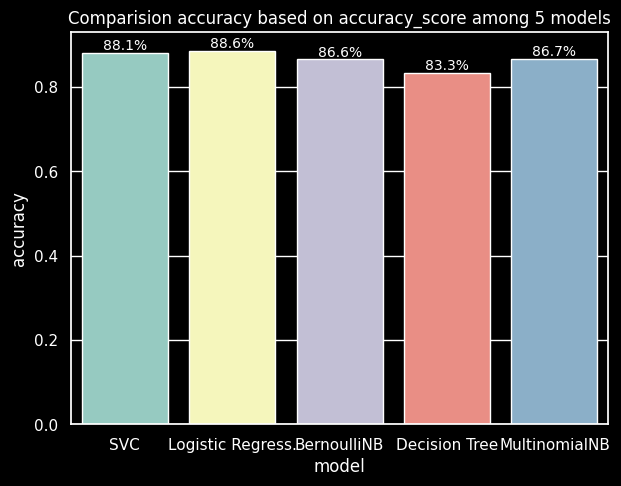

In [59]:
# Create bar chart
sns.barplot(x='model', y='accuracy', data=df)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.title ("Comparision accuracy based on accuracy_score among 5 models")
plt.show()

Thống kê các trường hợp dự đoán sai của mô hình có accuracy_score tốt nhất (Logistic Regression)

In [ ]:
sentence_difference = list ()
predict_label = list ()
true_label = list ()

for i in range (len(pred_rgs)):
  if pred_rgs[i] != ytest[i]:
    sentence_difference.append (xtest[i])
    true_label.append (ytest[i])
    predict_label.append (pred_rgs[i])
#print (diff_list)

dict_df = {
    "Sentence": sentence_difference,
    "Predict": predict_label,
    "True": true_label
}

#Print the headline has different predict with true label
df_differ = pd.DataFrame (dict_df)
#Xuất thành file csv
#df_differ.to_csv("/content/differ_in_predict.csv")

df_differ

,Sentence,Predict,True
0,metro 1 vẽ bậy 2 lớp bảo_vệ,0,1
1,náo_loạn viết tắt,0,1
2,mỹ_nhân ngô diệc phàm tù bất_ngờ đóng phim dân...,0,1
3,nhẫn vàng hồi_môn mẹ tặng,1,0
4,“ lật_mặt ” đôi huỳnh lập cano dự_án lý hải mi...,0,1
...,...,...,...
180,thanh_niên sạch nho tiệm điện_thoại,0,1
181,hàng_loạt vị thần xuất_hiện mạng xã_hội kỳ thi,1,0
182,tết thiếu_nhi đặc_biệt trường hy_vọng,1,0
183,dạy trẻ doạ trẻ,0,1


### Nhận xét

> Thống kê giữa các mô hình

- Về thời gian huấn luyện mô hình, 5 mô hình trên có thời gian huấn luyện và cho ra kết quả dự đoán nhanh, mô hình lâu nhất là SVC cần 5s để thực hiện 2 hoạt động này. Cho thấy ưu điểm khi dùng cách trích xuất này và các mô hình này là thời gian huấn luyện mô hình nhanh.  

- Về độ chính xác theo accuracy_score, 5 mô hình đều cho độ chính xác trong phân lớp trên 80%, trong đó tốt nhất là mô hình Logistic Regression 88.6%, mô hình khác như SVC đạt 88.1%, MultinomialNB đạt 86.7%, BernouliNB đạt 86.6% và thấp nhất là Decision Tree 83.2%. Cho thấy độ chính xác của các mô hình với dữ liệu là mức cao và rất tốt.

- Mô hình Logistic Regression có kết quả accuracy là 88.6%. Bên cạnh đó, mô hình cho kết quả ở các chỉ số precision, recall và F1 rất tốt, đều trên 80%, cụ thể precision 88%, recall 87% và F1 87%.

- Mô hình Support Vector Classifier, bên cạnh accuracy_score là 88.1%, 3 chỉ số precision, recall và F1 đều cho kết quả xấp xỉ 87%.

- Mô hình Multinomial Naive Bayes, có accuracy_score là 86.7%, precision là 86%, recall là 85% và F1 là 85%.

- Mô hình Bernouli Naive Bayes, có kết quả gần tương tự với Multinomial Naive Bayes, lần lượt các độ đo accuracy là 86.6% và sấp sĩ 85% ở 3 độ đo precision, recall, F1.

- Mô hình Decision Tree có kết quả tệ nhất trong 5 mô hình, accuracy là 83.2%, precision là 81%, recall là 83% và F1 là 82%. Cả 4 chỉ số nhìn chung đều thấp hơn các chỉ số này ở mô hình khác.

> So sánh trên từng nhãn

- Đối với label 0 (Not Sacractic Headline), số lượng dữ liệu ở label này đều hơn label 1 (Sacractic headline) ở cả tập Train và Test. Và khi nhìn vào độ chính xác, các mô hình đều thể hiện độ chính xác cao khi phân lớp ở label 0 này, các chỉ số dao động từ 82% đến hơn 93%, thể hiện các mô hình trên đã thực hiện phân lớp tốt với dữ liệu ở label này.
  + Precision, ở 5 mô hình, kết quả đạt được nằm trong khoảng 89% đến 90%, trong đó các mô hình SVC, Logistic Regression, Decision Tree có kết quả cao nhất là 90%.  
  + Recall ở nhãn này có kết quả rất cao, 93% Ở mô hình Logistic Regression, 91% ở 3 mô hình SVC, Bernouli, Multinomial và 83% ở model Decision Tree.
  + F1 thấp nhất ở Decision Tree (87%), mô hình BernouliNB và MultinomialNB đạt kết quả 90%, và cao nhất ở SVC và Logistic Regression (91%).   

- Đối label 1 (Sacratic Headline), do có sự mất cân bằng trong thu thập dữ liệu, nên tỉ lệ chính xác khi xét các độ đo là thấp hơn ở label 0, chỉ số dao động từ 73 đến 86%. Cho thấy các mô hình dự đoán ở các dữ liệu ở label này có độ chính xác thấp hơn, chỉ đạt mức khá.
  + Precision:  Kết quả ở các mô hình ở độ đo đạt mức khá tốt, từ 73 đến 86%, trong đó mô hình Logistic Regression đạt kết quả tốt nhất là 86%, sau đó SVC đạt 84%, Multinomial 83%, Bernouli 82% và thấp nhất là mô hình Decision Tree 73%.
  + Recall có kết quả trải dài, lần lượt từ thấp đến cao là 78%, 79%, 80%, 82%, 83%, trong đó Multinomial Naive Bayes có kết quả thấp nhất và Decision Tree cho kết quả ở độ đo này là tốt nhất.
  + F1 có kết quả ở mô hình Decision Tree có kết quả tệ nhất 77%, 4 mô hình còn lại đạt kết quả là 80%, 80%, 83%, 83% với mô hình Bernouli Naive Bayes và Logistic Règression có kết quả cao nhất.



### Kết luận với phương pháp trích xuất đặc trưng Count Vectorizer
Trong các mô hình đã thực hiện với phương pháp trích xuất đặc trưng Count Vectorizer, nhóm nhận thấy mô hình Logistic Regression thực hiện tốt nhất việc phân loại trên bộ dữ liệu này với điểm F1 cao nhất là 87%.
- Accuracy tốt nhất: 88.6%
- Macro Precision tốt nhất: 88%
- Macro Recall tốt thứ nhì (ngang SVC): 87%
- Macro F1 tốt nhất (ngang SVC): 87%

Bên cạnh đó, mô hình SVC, BernouliNB, MultinomialNB cũng có các kết quả khá tốt khi thực hiện phân lớp với bộ dữ liệu này. Riêng với Decision Tree, các kết quả trên tập kiểm thử thấp hơn 4 mô hình còn lại, cần tinh chỉnh thêm để có thể phân lớp tốt hơn

## Dùng Pre-Trained model PhoBERT

Nhóm thực hiện dùng PhoBERT để token từng mẫu dữ liệu sau đó train các mô hình gồm mô hình Transfer Learning thực hiện Fine Tuning từ mô hình PhoBERT, mô hình Support Vector Classifier, mô hình Logistic Regression, mô hình Bernouli Naive Bayes và mô hình Decision Tree.

## Model 6 - Transfer Learning - PhoBERT

Dựa trên mô hình Pre-trained cho ngôn ngữ Tiếng Việt PhoBERT, nhóm đã xây dựng lớp cuối để classifier dữ liệu theo 2 nhãn

### Fine Tuning of Pre-trained language model PhoBERT

In [23]:
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from transformers import get_linear_schedule_with_warmup

class HeadlineDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=30):
        self.df = df
        self.max_len = max_len
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        text, label = self.get_input_data(row)

        # Encode_plus will:
        # (1) split text into token
        # (2) Add the '[CLS]' and '[SEP]' token to the start and end
        # (3) Truncate/Pad sentence to max length
        # (4) Map token to their IDS
        # (5) Create attention mask
        # (6) Return a dictionary of outputs
        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_masks': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long),
        }

    def get_input_data(self, row):
        # Preprocessing: {remove icon, special character, lower}
        text = row['headline']
        label = row['is_sarcastic']
        return text, label

### Reuse the Pre-train model with a new last classifier layer

In [24]:
class HeadlineClassifier(nn.Module):
    def __init__(self, n_classes):
        super(HeadlineClassifier, self).__init__()
        self.bert = phobert#AutoModel.from_pretrained("vinai/phobert-base")
        self.drop = nn.Dropout(p=0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, n_classes)
        nn.init.normal_(self.fc.weight, std=0.02)
        nn.init.normal_(self.fc.bias, 0)

    def forward(self, input_ids, attention_mask):
        last_hidden_state, output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=False # Dropout will errors if without this
        )

        x = self.drop(output)
        x = self.fc(x)
        return x

### Load Transfer Model for Headline Classifer

In [25]:
model = HeadlineClassifier(n_classes = 2)
model

HeadlineClassifier(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Lay

### Create Train Function and Evaluation Function for Transfer Model

In [26]:
def train(model, criterion, optimizer, train_loader):
    model.train()
    losses = []
    correct = 0

    for data in train_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_masks'].to(device)
        targets = data['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        loss = criterion(outputs, targets)
        _, pred = torch.max(outputs, dim=1)

        correct += torch.sum(pred == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        lr_scheduler.step()

    print(f'Train Accuracy: {correct.double()/len(train_loader.dataset)} Loss: {np.mean(losses)}')

def eval(test_data = False):
    model.eval()
    losses = []
    correct = 0

    with torch.no_grad():
        data_loader = test_loader if test_data else valid_loader
        for data in data_loader:
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_masks'].to(device)
            targets = data['targets'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, pred = torch.max(outputs, dim=1)

            loss = criterion(outputs, targets)
            correct += torch.sum(pred == targets)
            losses.append(loss.item())

    if test_data:
        print(f'Test Accuracy: {correct.double()/len(test_loader.dataset)} Loss: {np.mean(losses)}')
        return correct.double()/len(test_loader.dataset)
    else:
        print(f'Valid Accuracy: {correct.double()/len(valid_loader.dataset)} Loss: {np.mean(losses)}')
        return correct.double()/len(valid_loader.dataset)

### Load dataset

In [27]:
def prepare_loaders(df):
    df_train, df_test =  train_test_split(df, test_size = 0.20, random_state = 42, shuffle = True)
    df_train, df_valid = train_test_split(df_train, test_size = 0.125, random_state = 42, shuffle = True)
    train_dataset = HeadlineDataset(df_train, tokenizer, max_len=30)
    valid_dataset = HeadlineDataset(df_valid, tokenizer, max_len=30)
    test_dataset = HeadlineDataset(df_test, tokenizer, max_len=30)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
    valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=2)

    return train_loader, valid_loader, test_loader

In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
EPOCHS = 2
model = model.to(device)
best_acc = 0

### Training model

#### Train the first 2 epochs and result in validation test

In [30]:
start13 = time.time()
train_loader, valid_loader,test_loader = prepare_loaders(data)

criterion = nn.CrossEntropyLoss()
    # Recommendation by BERT: lr: 5e-5, 2e-5, 3e-5
    # Batchsize: 16, 32
optimizer = AdamW(model.parameters(), lr=2e-5)

lr_scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=len(train_loader)*EPOCHS
        )
for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    print('-'*30)

    train(model, criterion, optimizer, train_loader)
    val_acc = eval()

    if val_acc > best_acc:
        torch.save(model.state_dict(), 'Sacrasm_Detection_model.pth')
        best_acc = val_acc

end13 = time.time()

Epoch 1/2
------------------------------
Train Accuracy: 0.7893164645932174 Loss: 0.4448761446087548
Valid Accuracy: 0.8843788437884379 Loss: 0.30250234729968584
Epoch 2/2
------------------------------
Train Accuracy: 0.8840274117026885 Loss: 0.2842437932163142
Valid Accuracy: 0.8905289052890529 Loss: 0.28039557801989407


#### Train the second 2 epoch and result in validation test

In [36]:
start14 = time.time()
train_loader, valid_loader,test_loader = prepare_loaders(data)

criterion = nn.CrossEntropyLoss()
    # Recommendation by BERT: lr: 5e-5, 2e-5, 3e-5
    # Batchsize: 16, 32
optimizer = AdamW(model.parameters(), lr=2e-5)

lr_scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=len(train_loader)*EPOCHS
        )
for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    print('-'*30)

    train(model, criterion, optimizer, train_loader)
    val_acc = eval()

    if val_acc > best_acc:
        torch.save(model.state_dict(), 'Sacrasm_Detection_model.pth')
        best_acc = val_acc

end14 = time.time()

Epoch 1/2
------------------------------
Train Accuracy: 0.9244421015638727 Loss: 0.2047638308905651
Valid Accuracy: 0.9003690036900369 Loss: 0.30693268904892296
Epoch 2/2
------------------------------
Train Accuracy: 0.9573010015814444 Loss: 0.1311387082854851
Valid Accuracy: 0.8991389913899139 Loss: 0.32079124422027516


#### Save model

In [47]:
!cp '/content/Sacrasm_Detection_model.pth' '/content/drive/MyDrive/CS114/Sacrasm_Headlines_Newspaper_Detection/Sacrasm_Detection_model.pth'

In [46]:
!cp '/content/drive/MyDrive/CS114/Sacrasm_Headlines_Newspaper_Detection/Sacrasm_Detection_model.pth' '/content/Sacrasm_Detection_model.pth'

### Predict of Transfer Learning model in Test dataset

In [37]:
start12 = time.time()
y = []
y_ = []
train_loader, valid_loader,test_loader = prepare_loaders(data)
model.eval()
with torch.no_grad():
        data_loader = test_loader
        for dat in data_loader:
            input_ids = dat['input_ids'].to(device)
            attention_mask = dat['attention_masks'].to(device)
            targets = dat['targets'].to(device)
            for i in targets:
                y.append(i)
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, pred = torch.max(outputs, dim=1)
            for i in pred:
                y_.append(i)

            #loss = criterion(outputs, targets)
            #correct += torch.sum(pred == targets)
            #losses.append(loss.item())

end12 = time.time()

### Result

In [45]:
print ("6/ Transfer Learning - PhoBERT")
print (f"Time Execution: {end12-start12+end13-start13+end14-start14}s")
print(f"Accuracy: {accuracy_score(y,y_)}")
print(classification_report(y,y_))

6/ Transfer Learning - PhoBERT
Time Execution: 9279.802758455276s
Accuracy: 0.906519065190652
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1060
           1       0.88      0.84      0.86       566

    accuracy                           0.91      1626
   macro avg       0.90      0.89      0.90      1626
weighted avg       0.91      0.91      0.91      1626



Confusion Matrix

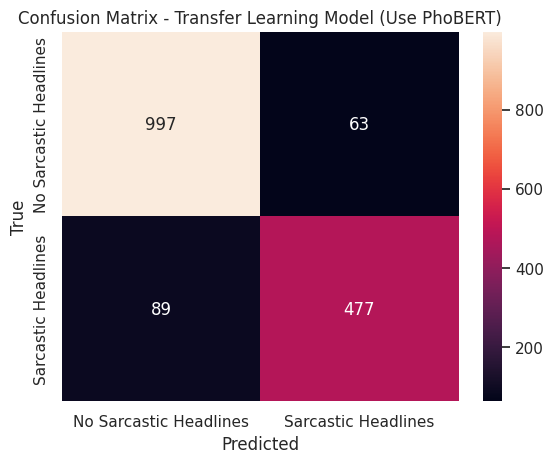

In [41]:
cf = confusion_matrix (y,y_)
sns.set(font_scale=1.)
sns.heatmap(cf, annot=True,xticklabels=label_name,yticklabels=label_name, annot_kws={"size": 12},fmt='d')
plt.title ("Confusion Matrix - Transfer Learning Model (Use PhoBERT)",fontsize=12)
plt.xlabel('Predicted',fontsize=12)
plt.ylabel('True',fontsize=12)
plt.show()

Thống kê các trường hợp khác nhau trong dự đoán và kết quả thực tế từ mô hình Transfer Learning

In [68]:
sentence_difference_2 = list ()
predict_label_2 = list ()
true_label_2 = list ()

for i in range (len(y_)):
  if y_[i] != y[i]:
    sentence_difference_2.append (xtest[i])
    true_label_2.append (int(y[i]))
    predict_label_2.append (int(y_[i]))

dict_df_2 = {
    "Sentence": sentence_difference_2,
    "Predict": predict_label_2,
    "True": true_label_2
}

#Print the headline has different predict with true label
df_differ_2 = pd.DataFrame (dict_df_2)
#Xuất thành file csv
#df_differ.to_csv("/content/differ_in_predict.csv")

df_differ_2

,Sentence,Predict,True
0,triển_lãm ảnh năng_lượng cuộc_sống,0,1
1,dịch_vụ phụ_trợ tuyến cao_tốc 176 km toa_lét t...,0,1
2,hai thái_cực tết tết,0,1
3,giá nguyên_liệu thức_ăn chăn_nuôi duy_trì xu_h...,0,1
4,xử_phạt sai sự_thật xuyên_tạc vụ 2 trụ_sở ubnd...,0,1
...,...,...,...
147,tỉ_phú bất_động_sản trung_quốc giàu châu_á sa_cơ,0,1
148,trang_bị an_toàn pitbull,0,1
149,điểm_chuẩn thi lớp 10 trường chuyên ngoại_ngữ ...,0,1
150,thần y sỏi thận chiếu mệnh,1,0


### Nhận xét

Có thể thấy với mô hình Transfer Learning được Fine Tuning từ PhoBERT, cho kết quả phân loại tốt hơn so với 5 mô hình ở phía trên ở điểm số ở F1 là 90%, accuracy đạt 91%.

Xét trên từng nhãn, kết quả các độ đo trên nhãn 0 nhìn chung cao hơn nhãn 1 như các mô hình ở trên, tuy nhiên nhãn 1 cũng đạt độ chính xác ở kết quả phân loại lên đến 86% (F1 score), tốt nhất giữa các mô hình. Với nhãn 0, kết quả phân lớp trên nhãn này có độ chinh xác lên đến 93% ở độ đo F1.

Tuy nhiên, để đạt đọ chính xác cao như vậy thì phải đánh đổi việc train mô hình này rất lâu. Ở các mô hình trên, thời gian từ Feature Extraction đến Training Model và Predict chỉ tốn chưa đến 10s cho từng mô hình. Tuy nhiên, với mô hình Transfer Learning, thời gian thực hiện train model tốn đến hơn 9000s train (chỉ train cho 2 epoch và predict). Đây là điểm bất cập lớn của mô hình này so với các mô hình Máy học đã dùng khác ở bài tập này.

##Feature Extraction 2 - Thực hiện trích xuất đặc trưng cho dữ liệu Text dùng model PhoBERT (Pre-trained language models for Vietnamese)

PhoBERT là mô hình mã nguồn mở công khai đầu tiên dùng cho ngôn ngữ Tiếng Việt. Nhóm sẽ thực hiện trích xuất đặc trưng dữ liệu là văn bản đã qua tiền xử lý Preprocessing đã thực hiện ở trên và sẽ thực hiện so sánh kết quả trên các model so với Count Vectorizer.  

Khác với Count Vectorizer, PhoBERT là mô hình có hướng xây dựng và phát triển dựa trên RoBERTa, mô hình pre-training có hướng tiếp cận và phát triển dựa trên BERT. Mô hình này sẽ thực hiện tách các từ trong câu thành các token sau đó gán cho token đó 1 số nguyên đại diện cho token đó.

Với Count Vectorizer thì con số đó cũng chính là tần số xuất hiện của token trong câu đó, nhưng với PhoBERT thì con số này sẽ được mô hình chỉ ra nhờ vào mô hình đã được xây dựng sẵn, dựa vào các token đã có trong mô hình thì sẽ cho ra một con số tương ứng với token đó.

### Training

In [42]:
import tensorflow
import autokeras
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Hàm thực hiện trích xuất đặc trưng bằng PhoBERT
def FeatureExtraction_by_PhoBERT (text):
  vector_feature = []
  sentence_ = []

  for sentence in text:
    token = tokenizer.encode(sentence)
    sentence_.append(token)
  sentences_pad = pad_sequences(sentence_, maxlen=30, padding='post')

  for sentence in sentences_pad:
    input_ids = torch.tensor([sentence])
    with torch.no_grad():
      features = phobert(input_ids)
    feature_extraction_sentence = features.last_hidden_state.squeeze(0).numpy().flatten()
    vector_feature.append(feature_extraction_sentence)

  vector_feature = np.array (vector_feature)
  return vector_feature

Using TensorFlow backend


In [60]:
#Thực hiện trích xuất đặc trưng bằng PhoBERT trên tập Train và tập Test
start15 = time.time()
X_train_preprocess = FeatureExtraction_by_PhoBERT (xtrain)
X_test_preprocess = FeatureExtraction_by_PhoBERT (xtest)
end15 = time.time()

#data_transform = FeatureExtraction_by_PhoBERT (data['text'])

Với tập X_train, kích thước của tập dữ liệu huấn luyện là (5468, 23040), trong đó 5468 là số điểm dữ liệu thực hiện Train, và 23040 là số thuộc tính được trích xuất sau khi dùng mô hình PhoBERT.

Tương tự với tập X_test, kích thước tập là (1367, 23040), trong đó 1367 là số điểm dữ liệu thực hiện testing và 23040 là số lượng đặc trưng được trích xuất.

Sau khi dùng PhoBERT để thực hiện trích xuất đặc trưng, lần lượt thu được các vector dùng để thực hiện huấn luyện và dự đoán cho mô hình

In [44]:
print ("Shape of Train: ", X_train_preprocess.shape)
print ("Shape of Test: ", X_test_preprocess.shape)
print ("X_train [0]:",X_train_preprocess[0])

Shape of Train:  (6504, 23040)
Shape of Test:  (1626, 23040)
X_train [0]: [ 0.37277073 -0.0379202   0.6375617  ...  0.05046618  0.18468884
  0.31493756]


Nhóm thực hiện xây dựng 4 model để thực hiện phân lớp cho bài tập này tương ứng với dùng phương pháp trích xuất đặc trưng PhoBERT gồm:
1. Support Vector Machine (SVM)*
2. Bernoulli Naive Bayes*
3. Decision Tree*
4. Logistic Regression (solver='liblinear', C = 3.0)

*Các tham số được dùng mặc định cho từng mô hình

In [61]:
start16 = time.time()
clf = svm.SVC()
clf.fit(X_train_preprocess ,ytrain)
end16 = time.time()

start17 = time.time()
bnb = BernoulliNB()
bnb.fit(X_train_preprocess, ytrain)
end17 = time.time()

start18 = time.time()
tree = DecisionTreeClassifier()
tree.fit(X_train_preprocess,ytrain)
end18 = time.time()

start19 = time.time()
rgs = LogisticRegression(solver='liblinear', C = 3.0)
rgs.fit(X_train_preprocess,ytrain)
end19 = time.time()

### Predict

Kết quả phân lớp của 5 mô hình dựa trên Classfication Report

In [62]:
start20 = time.time()
pred_svm_2 = clf.predict(X_test_preprocess)
end20 = time.time()

start21 = time.time()
pred_bnb_2 = bnb.predict(X_test_preprocess)
end21 = time.time()

start22 = time.time()
pred_tree_2 = tree.predict(X_test_preprocess)
end22 = time.time()

start23 = time.time()
pred_rgs_2 = rgs.predict(X_test_preprocess)
end23 = time.time()

print ("7/ Support Vector Classifer_PhoBERT")
print(f"Accuracy score: {accuracy_score(ytest,pred_svm_2)}")
print (f"Time Execution: {end15-start15+end16-start16+end20-start20}s")
print(classification_report(ytest,pred_svm_2))

print('-' * 55)

print ("8/ Bernoulli Naive Bayes")
print (f"Time Execution: {end15-start15+end17-start17+end21-start21}s")
print(f"Accuracy score: {accuracy_score(ytest,pred_bnb_2)}")
print(classification_report(ytest,pred_bnb_2))

print('-' * 55)

print ("9/ Decision Tree")
print (f"Time Execution: {end15-start15+end18-start18+end22-start22}s")
print(f"Accuracy score: {accuracy_score(ytest,pred_tree_2)}")
print(classification_report(ytest,pred_tree_2))

print('-' * 55)

print ("10/ Logistic Regression")
print (f"Time Execution: {end15-start15+end19-start19+end23-start23}s")
print(f"Accuracy Logistic Regression: {accuracy_score(ytest,pred_rgs_2)}")
print(classification_report(ytest,pred_rgs_2))

7/ Support Vector Classifer_PhoBERT
Accuracy score: 0.8991389913899139
Time Execution: 2210.4168050289154s
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1060
           1       0.83      0.89      0.86       566

    accuracy                           0.90      1626
   macro avg       0.89      0.90      0.89      1626
weighted avg       0.90      0.90      0.90      1626

-------------------------------------------------------
8/ Bernoulli Naive Bayes
Time Execution: 1828.7836124897003s
Accuracy score: 0.8585485854858549
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1060
           1       0.75      0.89      0.81       566

    accuracy                           0.86      1626
   macro avg       0.84      0.87      0.85      1626
weighted avg       0.87      0.86      0.86      1626

-------------------------------------------------------
9/ Decision Tree
Time Execution

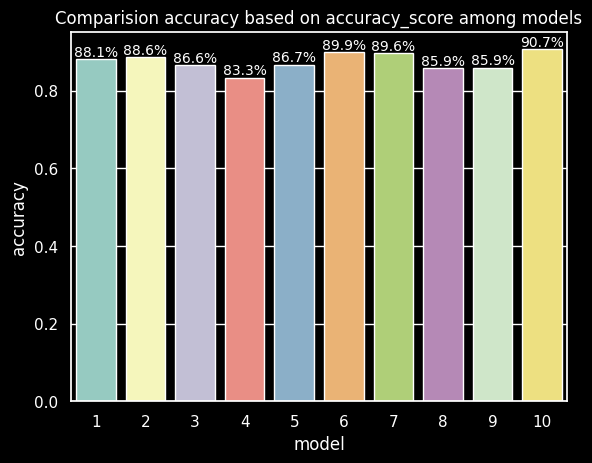

In [64]:
data_accuracy = {
    '1': accuracy_score(ytest,pred_svm), #SVC use Count Vectorizer
    '2':accuracy_score(ytest,pred_rgs), #Logistic Regression use Count Vectorizer
    '3': accuracy_score(ytest,pred_bnb), #Bernoulli Naive Bayes use Count Vectorizer
    '4': accuracy_score(ytest,pred_tree), #Decision Tree use Count Vectorizer
    '5': accuracy_score(ytest,pred_mnb),   #Multinomial use Count Vectorizer
    '6': accuracy_score(ytest,pred_svm_2), #SVC use PhoBERT for Feature Extraction
    '7':accuracy_score(ytest,pred_rgs_2), #Logistic Regression use PhoBERT for Feature Extraction
    '8': accuracy_score(ytest,pred_bnb_2), #Bernoulli Naive Bayes use PhoBERT for Feature Extraction
    '9': accuracy_score(ytest,pred_tree_2), #Decision Tree use PhoBERT for Feature Extraction
    '10': accuracy_score(y,y_),           #Transfer Learning with Fine Tuning from PhoBERT
}

df = pd.DataFrame.from_dict(data_accuracy, orient='index', columns=['accuracy'])
df = df.reset_index().rename(columns={'index': 'model'})

# Create bar chart
sns.barplot(x='model', y='accuracy', data=df)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.style.use('dark_background')
plt.title ("Comparision accuracy based on accuracy_score among models")
plt.show()

Thống kê các trường hợp dự đoán sai của mô hình có accuracy_score tốt nhất (mô hình Support Vector Classifier)

In [ ]:
sentence_difference_2 = list ()
predict_label_2 = list ()
true_label_2 = list ()

for i in range (len(pred_svm_2)):
  if pred_svm_2[i] != ytest[i]:
    sentence_difference_2.append (xtest[i])
    true_label_2.append (ytest[i])
    predict_label_2.append (pred_svm_2[i])

dict_df_2 = {
    "Sentence": sentence_difference_2,
    "Predict": predict_label_2,
    "True": true_label_2
}

#Print the headline has different predict with true label
df_differ_2 = pd.DataFrame (dict_df_2)
#Xuất thành file csv
#df_differ.to_csv("/content/differ_in_predict.csv")

df_differ_2

,Sentence,Predict,True
0,phẫn_nộ tài_xế chở bé đi dạo phố thùng_xe tải,1,0
1,chủ tịch trần hùng huy lộ quá_khứ đi đóng qu...,0,1
2,đột_quỵ ngày_càng xu_hướng trẻ_hoá,1,0
3,riot games tạm hoãn giải lcs 2023 rắc_rối game...,1,0
4,xe_buýt hệ fast & furious,0,1
...,...,...,...
242,quen dần quán ăn_không tiền_mặt,1,0
243,hàng_loạt vị thần xuất_hiện mạng xã_hội kỳ thi,1,0
244,hưởng_ứng thế_giới thuốc_lá,1,0
245,robinson quyết bờ,0,1


### Nhận xét

> Thống kê giữa các mô hình

- Về mặt thời gian thực thi, khi dùng PhoBERT để thực hiện trích xuất đặc trưng và thực hiện huấn luyện trên 4 mô hình này, nhóm nhận thấy thời gian thực thi lâu đáng kể so với khi dùng Count Vectorizer. Cụ thể, nhóm đã ghi nhận từ bước trích xuất đặc trưng đến huấn luyện ở từng mô hình và dự đoán trên tập Test, thời gian thực thi các bước này của mô hình nằm trong khoảng 1828 đến 2485s. Đây là nhược điểm khi bước trích xuất đặc trưng dùng PhoBERT này tốn nhiều thời gian hơn so với khi dùng Count Vectorizer.

- Mô hình SVC cho kết quả tốt nhất 83% ở độ đo F1 và 85% ở độ đo accuracy, sau đó là mô hình Logistic Regression 81% ở độ đo F1 và 83% ở độ đo accuracy. Các mô hình Decision Tree và BernouliNB lần lượt có kết quả là 77% và 69.9% (độ đo accuracy), là thấp nhất giữa các mô hình đã thực hiện ở bài tập này.

- Mô hình Support Vector Classifier có kết quả acccuracy là 85%, Macro Precision đạt 83%, Macro Recall 83% và Macro F1 đạt 83%. Các kết quả ở độ đo khác có tỉ lệ chính xác ở mức tốt, không lệch nhiều so với accuracy. Mô hình SVC với phương pháp trích xuất đặc trưng này có khả năng phân lớp mức khá tốt với dữ liệu này.

- Mô hình Logistic Regression có kết quả accuracy là 83.1%. Ở các độ đo còn lại, kết quả gồm Macro precision là 82%, Macro recall là 81% và Macro F1 là 81%. Có thể thấy so với SVC, thì mô hình này có các kết quả thấp hơn môt chút ở các chỉ số nhưng vẫn cho kết quả phân lớp ở mức khá đối với bộ dữ liệu này.

- So với 2 mô hình trên thì mô hình Decision Tree và BernouliNB cho kết quả phân lớp ở các phân lớp ở mức trung bình khá, độ chính xác giảm rất nhiều so với 2 mô hình trên. Cụ thể với Bernoulli, bên cạnh accuracy_score chỉ đạt 77%, các độ đo còn lại gồm Macro Precision đạt 75%, Macro Recall đạt 77% và Macro F1 chỉ đạt 76%.

- Mô hình Decision Tree có accuracy_score là 69.9%, và các độ đo Macro Precision, Macro Recall và Macro F1 đều chỉ đạt 67%. Các kết quả này là thấp nhất khi so sánh với 3 mô hình trên, ở mô hình Decision Tree và BernoulliNB cần cải thiện thêm dữ liệu huấn luyện và thực hiện tinh chính các tham số cho mô hình để mô hình tăng độ chính xác về phân lớp với bài toán này.

> So sánh trên từng label:

So với Count Vectorizer, thì với cách trích xuất đặc trưng này đều cho kết quả tốt hơn ở từng nhãn ở các mô hình. Nhìn chung, số liệu về độ chính xác trên label 0 tốt hơn hẳn so với label 1. Điều này cũng phản ánh nên được do chênh lệch dữ liệu ở label 0 này nên các mô hình phân lớp với độ chính xác tốt trên label 0 so với label 1.

- Đối với label 0 (Not Sacractic Headline): Các kết quả về độ chính xác trên label này đều có kết quả từ khoảng 84% trở lên và cao nhất là 94%. Mức độ phân lớp cho lớp này ở mô hình tốt.
  + Precision: Tốt nhất ở mô hình Support Vector Classifier và BernoulliNB 94%, tiếp đến là mô hình Logistic Regression 93%, và thấp nhất là Decision Tree với kết quả 89%.
  + Recall: Mô hình SVC và Logistic Regression cho kết quả tốt nhất là 91%, tiếp đến là Decision Tree là 90% và sau đó là mô hình BernoulliNB đạt 84%.
  + F1: Trên nhãn này rất tốt ở các mô hình, đạt kết quả trên dưới 90%, cụ thể SVC và Logistic Regression đạt 92% à BernoulliNB và Decision Tree đạt 89%.

- Đối label 1 (Sacratic Headline): Các kết quả dựa trên các độ đo đều dao động từ 75% và cao nhất là 89%, dù thấp hơn với nhãn 0 nhưng cho thấy kết quả phân lớp trên nhãn này ở 4 mô hình khá tốt.

  + Precision: Logistic Regression vẫn cho kết quả tốt nhất là 84%, tiếp đến là SVC là 83%, Decision Tree đạt 81% và thấp nhất là BernouliNB là 75%.
  + Recall: Mô hình SVC và BernouliNB cho kết quả tốt nhất là 89%, tiếp đến là Logistic Regression 86% và thấp nhất là Decision Tree chỉ đạt 78%.
  + F1: Điểm F1 ở nhãn 1 cho thấy các mô hình phân lớp ở nhãn này ở mức khá tốt, dao động từ 79% đến 86%, cao nhất là SVC và thấp nhất là Decision Tree.

### Kết luận với phương pháp trích xuất đặc trưng dùng model pre-trained PhoBERT
Mô hình Support Vector Classifier (SVC) cho kết quả phân loại tốt nhất khi dùng phương pháp trích xuất PhoBERT khi thực hiện phân lớp trên bộ dữ liệu này.

- Accuracy tốt nhất: 89.9%
- Macro Precision tốt nhất: 89%
- Macro Recall tốt nhất: 90%
- Macro F1 tốt nhất (ngang với Logistic Regression): 89%

Bên cạnh đó, mô hình Logistic Regression cũng có kết quả accuracy_score ở mức khá 89.6%, và các chỉ số macro precision (88%), macro recall (89%) và macro F1 (89%), cho thấy kết quả mô hình Logistic Regression có mức độ phân loại khá gần so với mô hình SVC ở phương pháp trích xuất đặc trưng này và kết quả này rất tốt.

Mô hình còn lại gồm Decision Tree và BernouliNB có kết quả accuracy đều là 86%. Trong đó F1 của mô hình Bernoulli (85%) có kết quả F1 cao hơn Decision Tree (84%). Có thể thấy, khi dùng cách trích xuất đặc trưng này, kết quả của 4 mô hình này có xu hướng cao hơn so với khi dùng Count Vectorizer và có kết quả thấp hơn với mô hình Transfer Learning.    

## Kết luận chung từ 10 mô hình được nhóm thực hiện

Qua 2 phương pháp trích xuất đặc trưng (Feature Extraction) và thực hiện xây dựng 10 mô hình bao gồm mô hình Transfer Learning thực hiện Fine Tuning từ mô hình Pre-train PhoBERT, có thể thấy rằng:

- So sánh giữa 10 mô hình, mô hình Transfer Learning thực hiện Fine Tuning của mô hình pre-train PhoBERT cho kết quả phân lớp tốt nhất cho bộ dữ liệu này. Với kết quả F1 là 90%, accuracy có kết quả cao nhất giữa các mô hình là 91%, tương tự với precision đạt 90% và Recall đạt 89%. Điểm trừ lớn nhất của mô hình này là tốn rất nhiều thời gian để huấn luyện mô hình cho ra kết quả dự đoán tốt nhất. Để train mô hình này, nhóm đã tốn hơn 9000s (hơn 2 tiếng) thực hiện trên nền tảng Google Collab. Đây là điểm trừ lớn nhất về thời gian ở mô hình này, để có thể huấn luyện mô hình có độ chính xác cao. Để cải thiện có thể đưa mô hình này thực hiện trên máy tính cá nhân và có thể chạy trên các máy có phần cứng tốt hơn vì bài tập nhóm đang thực hiện online trên collab, sẽ tốn nhiều thời gian thực hiện.

-  Ở phương pháp trích xuất đặc trưng Count Vectorizer, mô hình Logistic Regression có kết quả phân lớp tốt nhất với F1 đạt 87% và accuracy đạt 89%, precision đạt 88% và recall đạt 87%. Bên cạnh mô hình này, mô hình SVC cho kết quả tốt với F1 cùng là 87% nhưng thaaos hơn ở accuracy, precision. Các mô hình còn lại đều cho kết quả ở các độ đo của mô hình đạt trên 80%. Các mô hình dùng phương pháp trích xuất đặc trưng này có ưu thế về thời gian nhất so với dùng PhoBERT và mô hình Transfer Learning. Tuy nhiên, lại thấp nhất về độ chính xác ở các độ đo giữa các mô hình. Có thể cải thiện bằng cách thực hiện tinh chỉnh với các tham số khác cho các mô hình hoặc áp dụng các mô hình phân lớp phức tạp hơn như mô hình Deep Learning.

- Ở phương pháp trích xuất đặc trưng dùng mô hình pre-trained model, mô hình cho kết quả tốt nhất là 2 mô hình SVC và Logistic Regression, trong đó cả 2 đều cho kết quả F1 là 89%, accuracy là 90%. Precision và Recall của SVC tốt hơn 1 chút so với Logisitc Regression, 2 mô hình còn lại đều cho kết quả từ mốc 84% trở lên ở các độ đo. So với cùng mô hình đó ở cách trích xuất đặc trưng Count Vectorizer thì các mô hình dùng phương pháp trích xuất đặc trưng này đạt kết quả tốt hơn ở các độ đo. Tuy nhiên, đổi lại, thời gian trích xuất đặc trưng, huấn luyện mô hình và đưa ra dự đoán trên Test sẽ tốn nhiều thời gian đáng kể so với Count Vectorizer. Các mô hình này tương tự như mô hình đã thực hiện Count Vectorizer thì cần thực hiện tinh chỉnh các tham số của các mô hình.

## Cải thiện kết quả cho bài toán phân lớp: Sarcasm Headlines Newspaper Detection

- Về chất lượng dữ liệu, khó để đánh giá vì chưa có tiêu chuẩn để đưa ra kết luận Headline có phải thuộc lớp Sarcasm hay Not Sacrcasm. Do đó, nhóm cũng đặt nghi ngờ với các Headlines được gán nhãn 1 ở bộ dữ liệu này.

- Để cải thiện, có thể cần tăng cường dữ liệu ở label 1 để cải thiện khả năng dự đoán tốt hơn ở các mô hình. Nhưng việc này sẽ khó khăn vì thực tế không dễ thu thập các bài báo sacractic bằng tiếng Việt.

- Có thể nghiên cứu tăng cường dữ liệu bằng các phương pháp hiện có như oversampling hoặc undersampling để giảm trường hợp mất cân bằng dữ liệu ở các nhãn.

- Thực hiện tinh chỉnh các siêu tham số (hyper-parameter) để cải thiện hiệu năng của mô hình.

- Thử nghiệm với các mô hình khác như mô hình Deep Learning hoặc mô hình Máy học Kết hợp (Essemble Learning) vì các mô hình này có các thuật toán thực hiện huấn luyện và cho ra kết quả phân lớp tốt và biến hóa trên nhiều dữ liệu khác nhau.